In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
%matplotlib inline

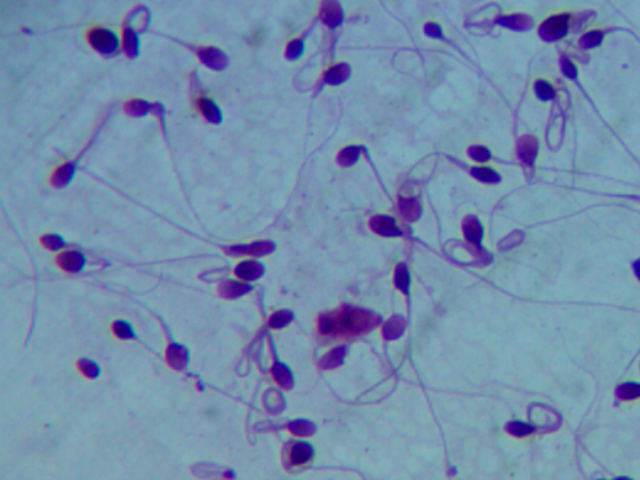

In [41]:
img = Image.open("29.jpg")
img = img.resize(size = (640, 480))
img

In [42]:
type(img)
img.size

(640, 480)

In [43]:
img_arr = np.asarray(img)
img_arr.shape

(480, 640, 4)

In [44]:
img_arr = img_arr[:,:,0:3].copy()
img_arr.shape

(480, 640, 3)

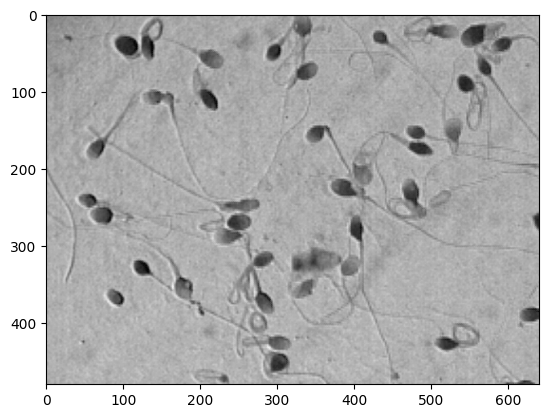

In [45]:
plt.imshow(img_arr[:, :, 0], cmap = 'gray')

In [46]:
pxlperum=100/20
MethodFlag=1
NormalLabel=0

## Whole cells segmentation with BottomHat method

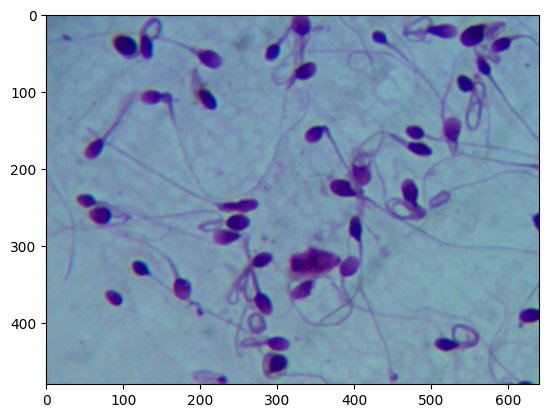

In [47]:
median = cv2.medianBlur(img_arr,3)
plt.imshow(median)

In [48]:
height, width, channel = img_arr.shape
height, width, channel

(480, 640, 3)

0
1
2


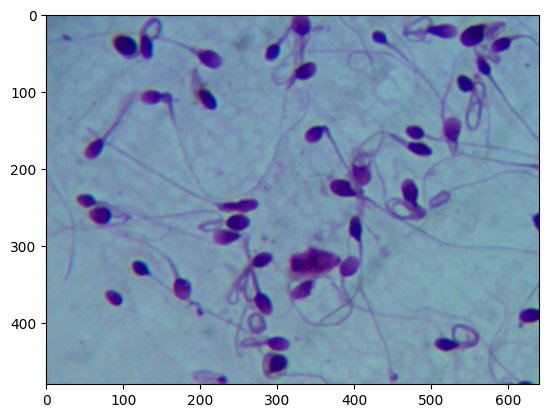

In [49]:
## Denoise image with a small window Median in each Color Channel
im1 = img_arr       #initialize denoised image
for cch in range(0, channel):     #for each color channel
    im1[:,:,cch] = cv2.medianBlur(im1[:,:,cch],3) # denoised Image
    print(cch)

plt.imshow(im1)

In [50]:
## Head detection
I = rgb2gray(im1); #to gray
figure(2);subplot(121);imshow(I);subplot(122); imshow(im0)

# find heads with the usual way (otsu thresholding)
####### reflection removal by zt
grayImage_avg=mean(mean(I(:,:)));
grayImage_mod=I.*0;
for i=2:size(I,1)-1
    for j=2:size(I,2)-1
        reflect(i,j)=mean(mean(I(i-1:i+1,j-1:j+1)));
        if  reflect(i,j)>=1.1*grayImage_avg
            grayImage_mod(i,j)=grayImage_avg;
        else grayImage_mod(i,j)=I(i,j);
        end
    end
end
########  zt
subplot(121);imshow(I);subplot(122);imshow(grayImage_mod);
I4 = adapthisteq(grayImage_mod); %apative histogram eq. J = adapthisteq(I) enhances the contrast of the grayscale image I by transforming the values using contrast-limited adaptive histogram equalization 
figure(); imshow(I4)
lev = graythresh(I4);
I43 = imbinarize(I4,lev);
figure(); imshow(I43)
I5 = bwareaopen(imcomplement(I43), floor(41.5*pxlperum)); %remove small objects
figure(); imshow(I5)
heads = imcomplement(I5);
figure(); imshow(heads)

SyntaxError: invalid syntax (3048714094.py, line 7)

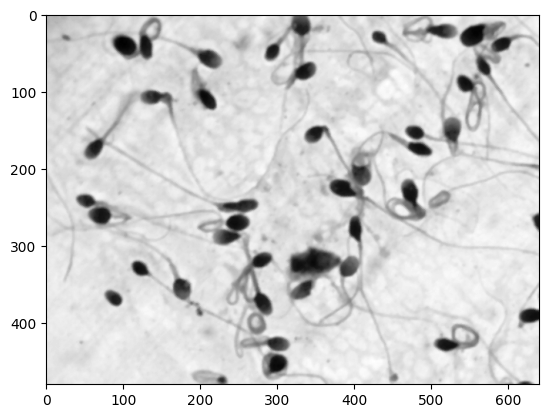

In [51]:
## Head detection
I = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)   # to gray
plt.imshow(I, cmap='gray')

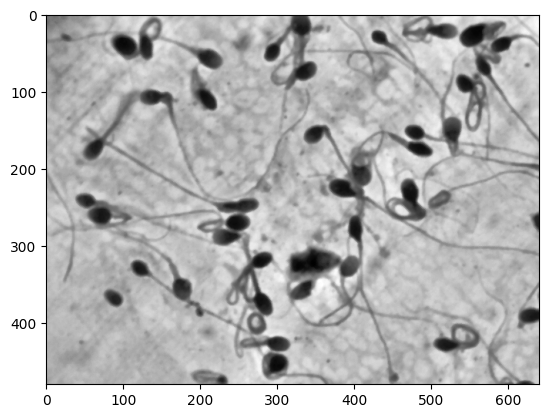

In [52]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
I4 = clahe.apply(I)
plt.imshow(I4, cmap="gray")

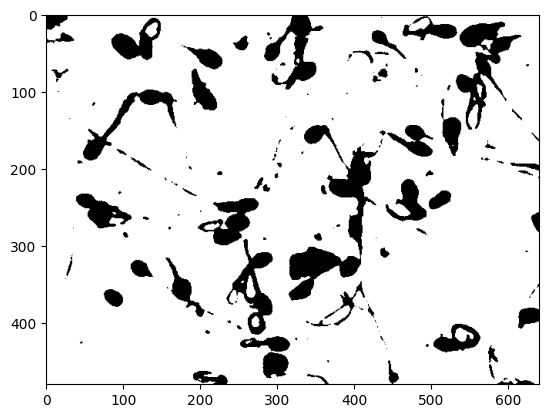

In [53]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(I4,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap= 'gray')

c:\Users\Mit\Documents\PythonProjects\ENV\MEnv\lib\site-packages\skimage\_shared\utils.py:157: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  return func(*args, **kwargs)


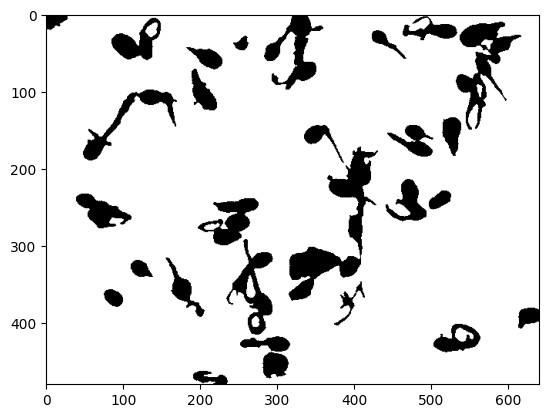

In [54]:
# Now we want to define a function that can remove small objects
from skimage import morphology
def remove_small_objects(img):

    # Remove small objects from image (WSO = Without Small Objects)
    IheadWSO = np.array(img)
    IheadWSO = morphology.remove_small_holes(IheadWSO, 41.5*pxlperum)
    Ihead = morphology.remove_small_objects(IheadWSO, min_size=30, connectivity=50).astype(np.uint8)
    Ihead[Ihead!=0] = 255
    return Ihead


heads = remove_small_objects(th2)
plt.imshow(heads, cmap='gray')

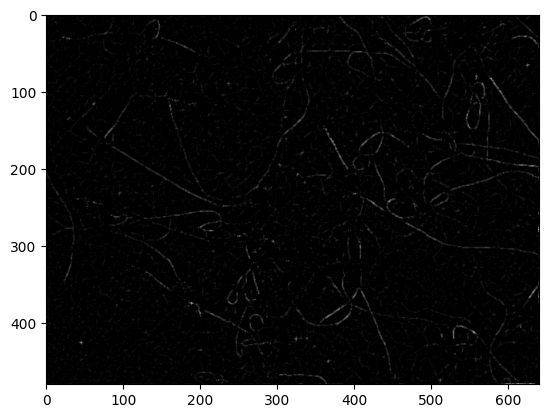

In [55]:
# Bottom Hat Filtering
kernel = np.ones((3,3),np.uint8)
BottumHatIm = cv2.morphologyEx(I, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(BottumHatIm, cmap= 'gray')

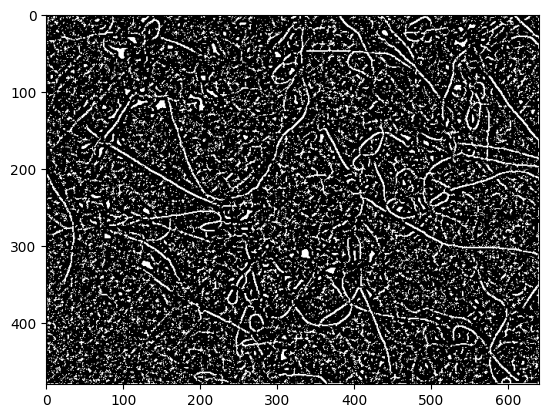

In [56]:
# Histogram Equalize

EqBottumHatIm = cv2.equalizeHist(BottumHatIm)

# Adaptive thresholding

BinaryBottumHatIm = cv2.adaptiveThreshold(EqBottumHatIm,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)
plt.imshow(BinaryBottumHatIm, cmap= 'gray')

In [ ]:
## Post Processing Bottom hat results

withheads = np.logical_or(BinaryBottumHatIm, ophead)    #add heads to the network of the tails
plt.imshow(withheads, cmap= 'gray')

NameError: name 'ophead' is not defined

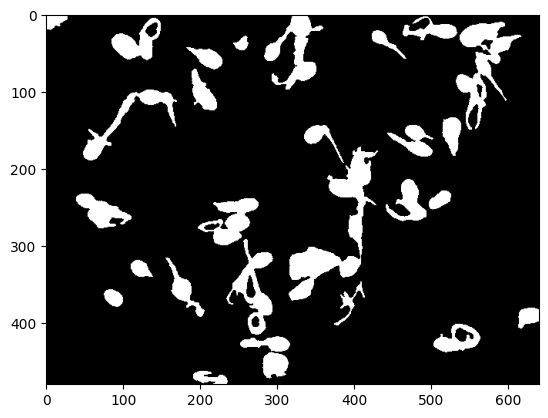

In [57]:
heads[heads!=0] = 1

heads[heads==0] = 255
heads[heads == 1] = 0
ophead = heads
plt.imshow(ophead, cmap='gray')

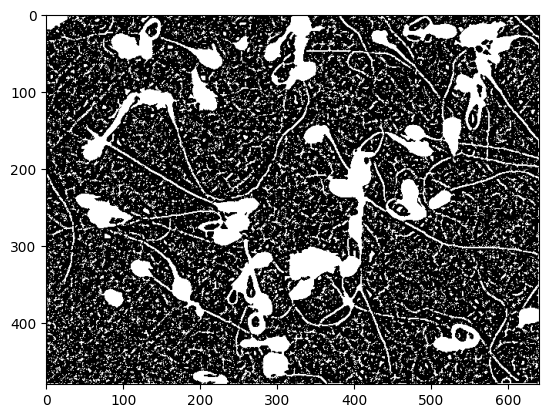

In [58]:
## Post Processing Bottom hat results

withheads = np.logical_or(BinaryBottumHatIm, ophead)    #add heads to the network of the tails
plt.imshow(withheads, cmap= 'gray')

In [59]:
def remove_small_objects(img, minSize):

    # Remove small objects from image (WSO = Without Small Objects)
    imgWSO = np.array(img)
    imgWSO = morphology.remove_small_holes(imgWSO, minSize)
    I = morphology.remove_small_objects(imgWSO, min_size=30, connectivity=50).astype(np.uint8)
    I[I!=0] = 255
    return I


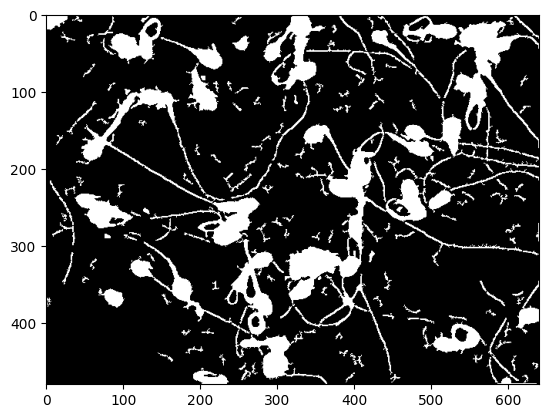

In [60]:
tails = remove_small_objects(withheads, 21*pxlperum)
plt.imshow(tails, cmap= 'gray')

In [ ]:
tails.shape

(480, 640)

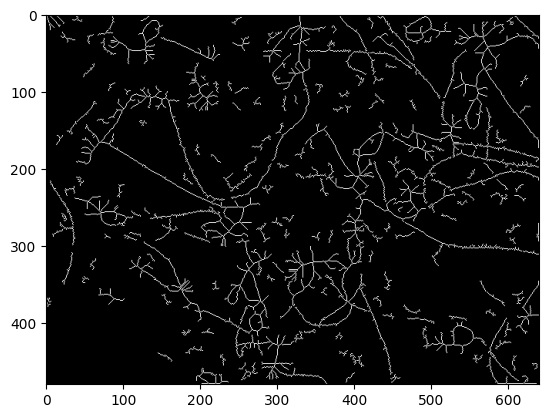

In [61]:
from skimage import img_as_bool, io, color, morphology

image = img_as_bool(tails)
tailNet = morphology.medial_axis(image)
plt.imshow(tailNet, cmap= 'gray')

Now we got the output of BottomHatSegmentationMethod that are tailNet and Icell

In [62]:
Icell = withheads

## Head extraction

Input Args:

    I                   -> Raw image

    Icell               -> matrix with heads and tails

    removNonHeadRegion  -> floor(4*pxlperum) = 20


Output:

    Iw  ->

    Ihead ->
    
    Itail ->


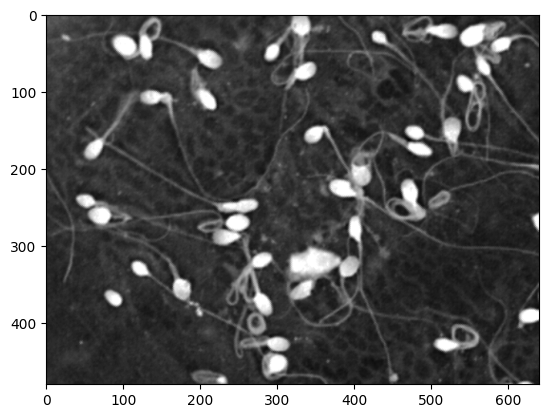

In [63]:
## Head Extraction

from PIL import Image

# if image.mode == 'CMYK':
#     rgb_image = image.convert('RGB')

img = Image.open("29.jpg")
img = img.resize(size = (640, 480))
Icmyk = img.convert('CMYK')
# Im = Icmyk[:,:,2]
Im = np.asarray(Icmyk)
Im = Im[:, :, 1 ]
plt.imshow(Im, cmap='gray')


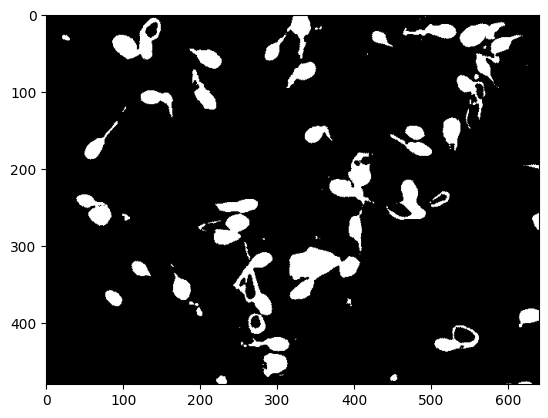

In [64]:
# Otsu's thresholding
ret2,thm = cv2.threshold(Im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thm, cmap= 'gray')

In [65]:
# clear small regions
def remove_small_objects(img, minSize):

    # Remove small objects from image (WSO = Without Small Objects)
    imgWSO = np.array(img)
    imgWSO = morphology.remove_small_holes(imgWSO, minSize)
    I = morphology.remove_small_objects(imgWSO, min_size=30, connectivity=4).astype(np.uint8)
    I[I!=0] = 255
    return I


removNonHeadRegion=(4*pxlperum)

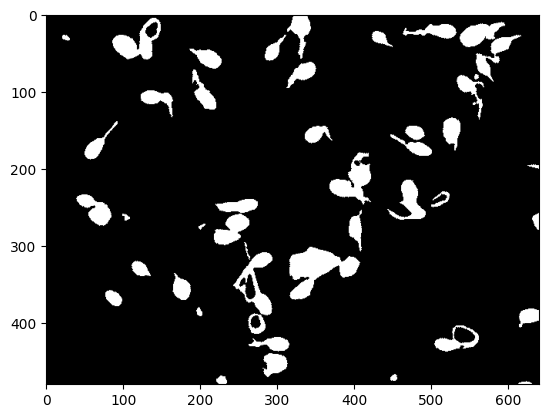

In [66]:
Ihead = remove_small_objects(thm, removNonHeadRegion)
plt.imshow(Ihead, cmap= 'gray')

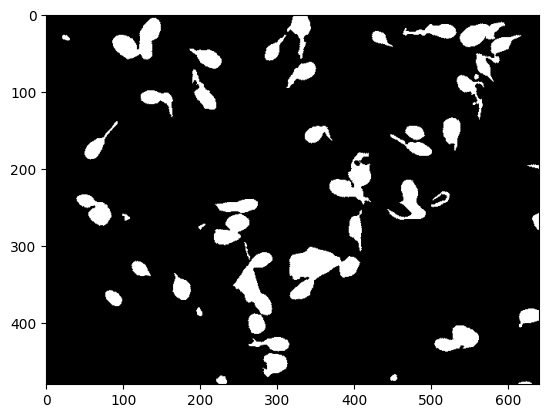

In [107]:
from scipy import ndimage
import numpy as np

Ihead = ndimage.binary_fill_holes(Ihead)
plt.imshow(Ihead, cmap= 'gray')

In [ ]:
a = Ihead.astype(int)

In [ ]:
b = 1 - a
b

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

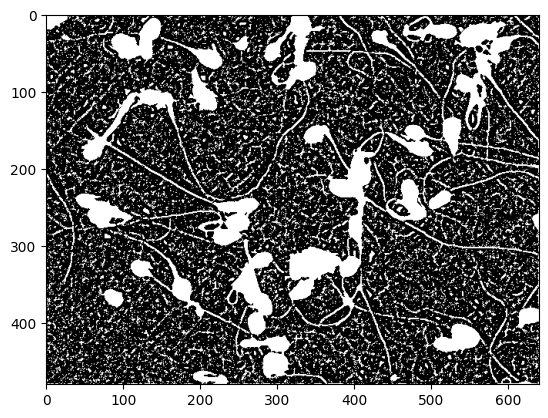

In [68]:
Iw=Ihead+Icell
plt.imshow(Iw, cmap= 'gray')

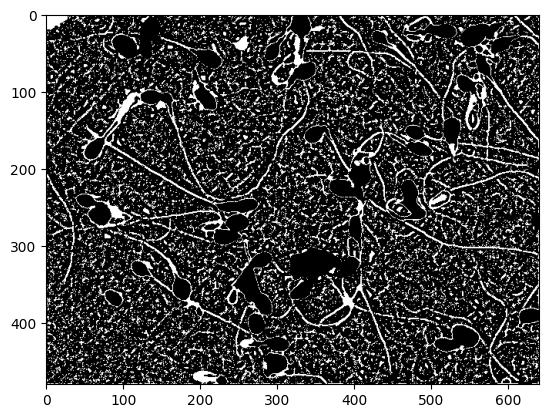

In [69]:

Itail = np.multiply(Iw,1 - Ihead.astype(int))
plt.imshow(Itail, cmap= 'gray')

#  separate connected head using watershed algorithm

    Input:

        Args:

            Icell, Ihead, minHeadSz, maxHeadSz

    OutPut:

        Args:   

            Ifheadf0



            
           

In [70]:
# clear small regions
def remove_small_objects(img, minSize):

    # Remove small objects from image (WSO = Without Small Objects)
    imgWSO = np.array(img)
    imgWSO = morphology.remove_small_holes(imgWSO, minSize)
    I = morphology.remove_small_objects(imgWSO, min_size=30, connectivity=4).astype(np.uint8)
    I[I!=0] = 255
    return I


removNonHeadRegion=(4*pxlperum)

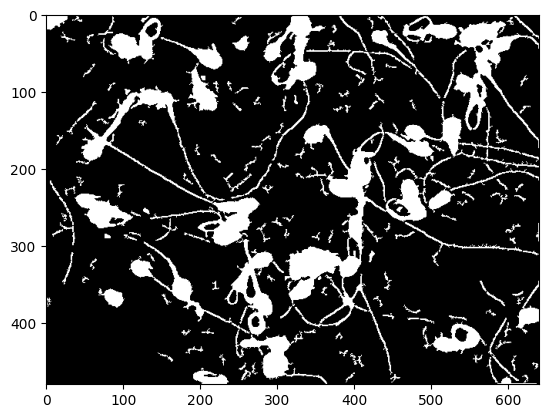

In [71]:
# separate connected head using watershed algorithm
maxHeadSz=17.*pxlperum
minHeadSz=12.*pxlperum
Ihead1 = remove_small_objects(Icell, minHeadSz)
plt.imshow(Ihead1, cmap= 'gray')

In [133]:
Ihead = Ihead.astype(int)

In [124]:
Ihead[Ihead[:, :] == False] = 0
Ihead[Ihead[:, :] == True] = 1

In [134]:
Ihead

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [136]:
# cv2.imwrite("output.jpg", Ihead1)
cv2.imwrite("output_1.jpg", Ihead)

True

In [137]:
# Read the image

img = cv2.imread('output_1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

(-0.5, 639.5, 479.5, -0.5)

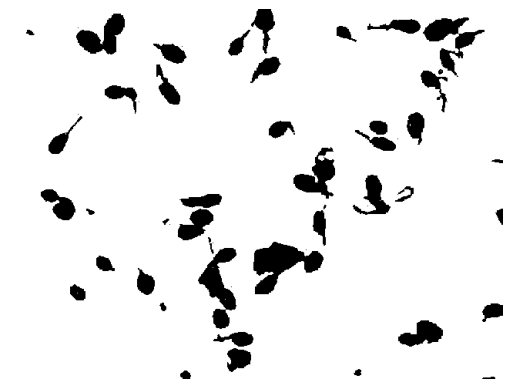

In [138]:
# Step 3: Threshold Processing
#Threshold Processing
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, bin_img = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray')
plt.axis(False)

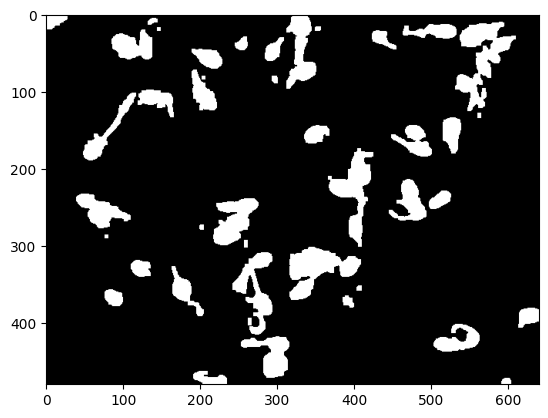

In [139]:
# Step 4: Noise Removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(Ihead1, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=2)
plt.imshow(bin_img, cmap='gray')


Text(0.5, 1.0, 'UnKnown')

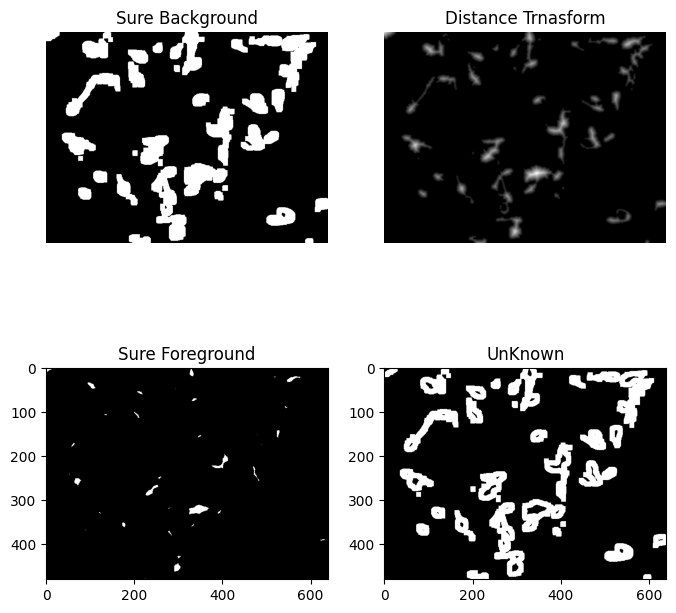

In [140]:
# Step 5: Grasping the black background and foreground of the image
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))

# Sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations = 3)
axes[0, 0].set_title("Sure Background")
axes[0, 0].imshow(sure_bg, cmap = 'gray')
axes[0, 0].axis(False)

# Distance transform 
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)

axes[0, 1].imshow(dist, cmap = 'gray')
axes[0, 1].axis(False)
axes[0, 1].set_title("Distance Trnasform")

# Foreground Area

ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)

sure_fg = sure_fg.astype(np.uint8)
axes[1, 0].imshow(sure_fg, cmap = "gray")
axes[1, 0].set_title("Sure Foreground")

# unknown Area 
unknown = cv2.subtract(sure_bg, sure_fg)

axes[1, 1].imshow(unknown, cmap = "gray")
axes[1, 1].set_title("UnKnown")

36


(-0.5, 639.5, 479.5, -0.5)

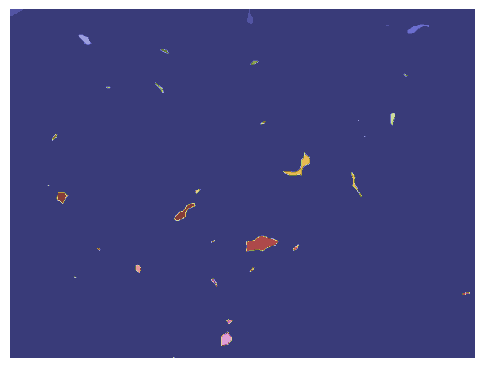

In [141]:
# Step 6 Marker labeling

# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)


print(ret)

# Add one to all labels so that background is not 0, but 1
markers += 1

# mark the region of unknown with zero 
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize = (6, 6)) 
ax.imshow(markers, cmap = "tab20b")
ax.axis(False)

In [142]:
markers.dtype

dtype('int32')

In [143]:
img.dtype

dtype('uint8')

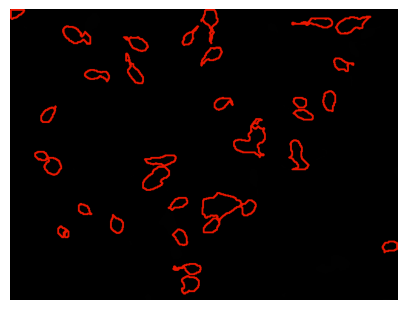

In [147]:
# Step 7 Apply Watershed Algorithm to Markers

# watershedAlgorithm
# Im = Im.astype(np.uint8)
# markers = markers.astype(np.uint8)
markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(markers, cmap = "tab20b")
ax.axis(False)

labels = np.unique(markers)

coins = []
for label in labels[2:]:
    # Create a binary image in which only the area of the label is the foreground and 
    # the rest of the image is in the background

    target = np.where(markers == label, 255, 0).astype(np.uint8)

    # Perform contour extraction on the created binary image 

    contours, hirerarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    
    )

    coins.append(contours[0])

# Draw the outline

result = cv2.drawContours(img, coins, -1, color = (233, 23, 0), thickness=2)

plt.imshow(result, cmap='gray')



# Test Zone

In [ ]:
import numpy as np

center1 = -10
center2 = -center1
dist = np.sqrt(2*(2*center1)**2)
radius = 1.4*dist/2
lims = (np.floor(center1 - 1.2*radius), np.ceil(center2 + 1.2*radius))
x, y = np.meshgrid(np.arange(lims[0], lims[1]), np.arange(lims[0], lims[1]))
disk1 = np.sqrt((x - center1)**2 + (y - center1)**2) <= radius
disk2 = np.sqrt((x - center2)**2 + (y - center2)**2) <= radius
disks = np.logical_or(disk1, disk2)

In [ ]:
import scipy.ndimage as ndi

dist_trans_img = ndi.distance_transform_edt(disks)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"


(-0.5, 251.5, 311.5, -0.5)

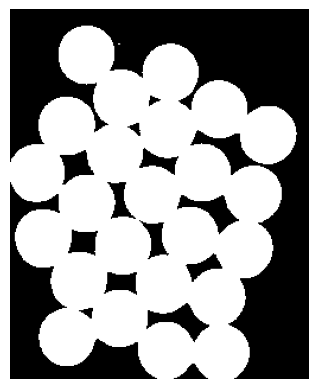

In [ ]:
# Step 3: Threshold Processing
#Threshold Processing
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, bin_img = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray')
plt.axis(False)


(-0.5, 251.5, 311.5, -0.5)

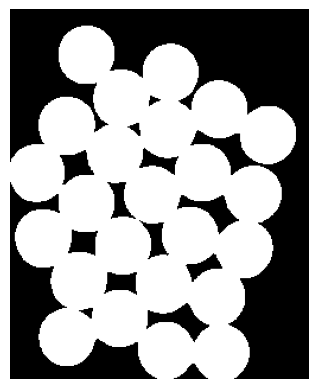

In [ ]:
# Step 4: Noise Removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=2)


plt.imshow(bin_img, cmap='gray')
plt.axis(False)

Text(0.5, 1.0, 'UnKnown')

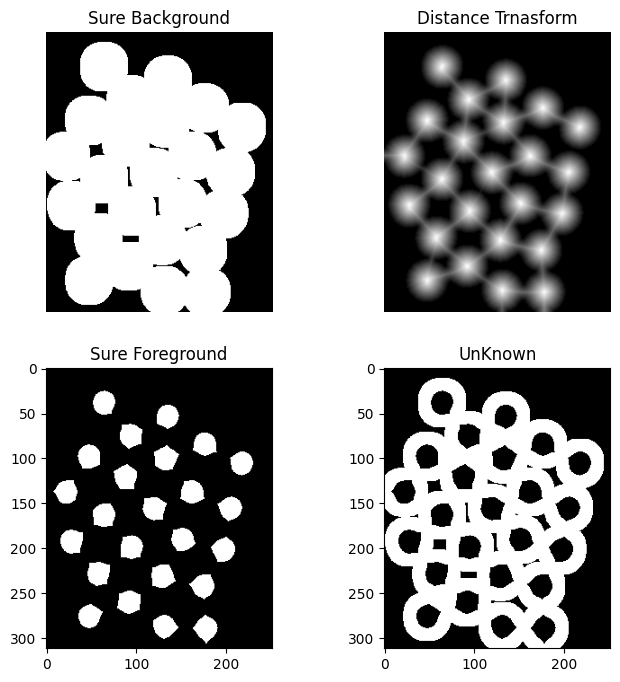

In [ ]:
# Step 5: Grasping the black background and foreground of the image
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 8))

# Sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations = 3)
axes[0, 0].set_title("Sure Background")
axes[0, 0].imshow(sure_bg, cmap = 'gray')
axes[0, 0].axis(False)

# Distance transform 
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)

axes[0, 1].imshow(dist, cmap = 'gray')
axes[0, 1].axis(False)
axes[0, 1].set_title("Distance Trnasform")

# Foreground Area

ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)

sure_fg = sure_fg.astype(np.uint8)
axes[1, 0].imshow(sure_fg, cmap = "gray")
axes[1, 0].set_title("Sure Foreground")

# unknown Area 
unknown = cv2.subtract(sure_bg, sure_fg)

axes[1, 1].imshow(unknown, cmap = "gray")
axes[1, 1].set_title("UnKnown")

25


(-0.5, 251.5, 311.5, -0.5)

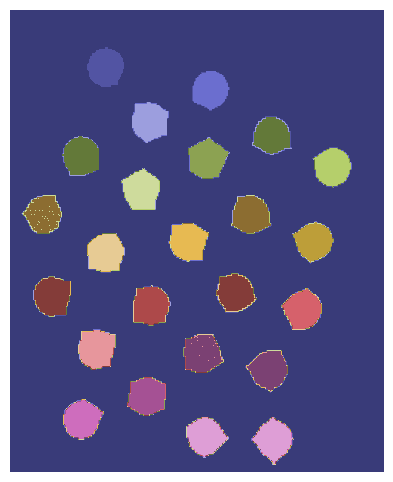

In [ ]:
# Marker labeling

# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)


print(ret)

# Add one to all labels so that background is not 0, but 1
markers += 1

# mark the region of unknown with zero 
markers[unknown == 255] = 0

fig, ax = plt.subplots(figsize = (6, 6)) 
ax.imshow(markers, cmap = "tab20b")
ax.axis(False)



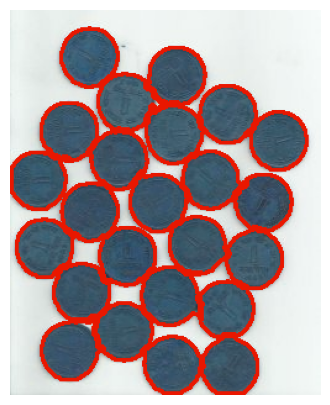

In [ ]:
# Step 7 Apply Watershed Algorithm to Markers

# watershedAlgorithm

markers = cv2.watershed(img, markers)

fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(markers, cmap = "tab20b")
ax.axis(False)

labels = np.unique(markers)

coins = []
for label in labels[2:]:
    # Create a binary image in which only the area of the label is the foreground and 
    # the rest of the image is in the background

    target = np.where(markers == label, 255, 0).astype(np.uint8)

    # Perform contour extraction on the created binary image 

    contours, hirerarchy = cv2.findContours(
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    
    )

    coins.append(contours[0])

# Draw the outline

img  = cv2.drawContours(img, coins, -1, color = (233, 23, 0), thickness=2)
plt.imshow(img, cmap = "gray")

